# Handwritten Digit Recognition | Machine Learning

__Description : Recongition of handwritten digits using different SVM kernel and determination of best Kernel performance.__

__Python libraries used :__
    1. Pandas
    2. Numpy
    3. Scikit-learn
    4. Matplotlib

Import pandas and Scikit-learn Digits dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_digits

## Analizing the Data

Load the dataset into _digit_data_ and inspect its basic features

In [2]:
digit_data = load_digits()
dir(digit_data)

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
type(digit_data)

sklearn.utils.Bunch

Let us explore the features -  __target__ and __target_names__

In [4]:
digit_data.target[:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

In [5]:
digit_data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Analizing a sample image and its pixels

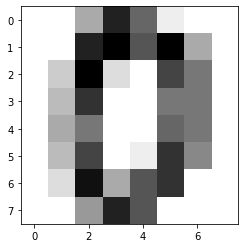

In [6]:
import matplotlib.pyplot as plt
plt.imshow(digit_data.images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')

This is a grayscale image with 8 x 8 = 64 pixels. Each pixel represents a value from 0 to 255.

Let us examine the feature - __data__

In [7]:
digit_data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

These are the values of pixel intensities, each pixel from 0 to 255 to form the image like one above.

### Visualizing first 20 Images from the Dataset with their labels

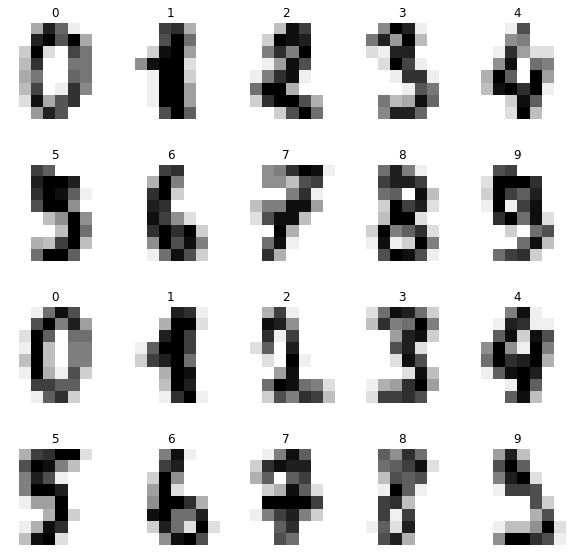

In [8]:
img_label = list(zip(digit_data.images, digit_data.target))
plt.figure(figsize = (10, 10))
for i in range(0, 20):
    plt.subplot(4, 5, i + 1)
    plt.axis('off')
    plt.imshow(digit_data.images[i], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title(digit_data.target[i])

We can vaguely recognize the digits with there labels.

## Loading Image data and labels to dataframe

Create a data frame _df_ with _digit_data.data_

In [9]:
df = pd.DataFrame(digit_data.data, digit_data.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Load the data frame _df_ with _target_ and inspect first 15 rows.

In [10]:
df['target'] = digit_data.target
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [11]:
df.count()

0         1797
1         1797
2         1797
3         1797
4         1797
          ... 
60        1797
61        1797
62        1797
63        1797
target    1797
Length: 65, dtype: int64

## Preparing training and test data with X as features and Y as labels.

We take all columns in X and target column in Y for training

In [12]:
X = df.drop(['target'], axis = 'columns')
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
Y = df.target
Y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

## Training the Models

Import SVC model from sklearn and create SVM model with different kernel. Play with different values of C and gamma.

In [14]:
from sklearn.svm import SVC
svm_linear = SVC(C = 1, kernel = 'linear')              # Linear Kernel SVM
svm_poly = SVC(C = 1, kernel = 'poly', degree = 2)      # Polynomial Kernel SVM
svm_rbf = SVC(C = 1, kernel = 'rbf', gamma = 0.1)       # Gaussian Kernel SVM

Spliting the features and labels into 80% training and 20% test data

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Fit the models with trainig data

In [16]:
svm_linear.fit(x_train, y_train)
svm_poly.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Making Model Prediction and Computing Accuracy

Compare the score of each SVM Kernel with test data

In [43]:
model_name = [svm_linear, svm_poly, svm_rbf]
kernel_name = ['Linear', 'Polynomial', 'Gaussian']
scores = []
for i in range(len(model_name)):
    y_pred = model_name[i].predict(x_test)
    y_scores = model_name[i].score(x_test, y_test)
    scores.append({
            'SVM Kernel' : kernel_name[i],
            'Accuracy'  : y_scores
        })

y_pred_linear = svm_linear.predict(x_test)
y_pred_poly = svm_poly.predict(x_test)
y_pred_rbf = svm_rbf.predict(x_test)

score_df = pd.DataFrame(scores, columns = ['SVM Kernel', 'Accuracy'])
score_df



,SVM Kernel,Accuracy
0,Linear,0.975000
1,Polynomial,0.977778
2,Gaussian,0.083333


After comparison we found that SVM model with Polynomial kernel has highest accuracy = 97.7 %

## Evaluating the Model

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

### 1. Evaluating Linear Kernel SVM

In [19]:
print('Confusion Matrix for Linear Kernel SVM :\n\n', confusion_matrix(y_test,y_pred_linear))
print('\n\n\nClassification Report for Linear Kernel SVM :\n\n', classification_report(y_test,y_pred_linear))

Confusion Matrix for Linear Kernel SVM :

 [[38  0  0  0  0  0  1  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  1]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  1  0 32  0  0  0  1]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  1  0  0 29  0  0]
 [ 0  1  0  0  0  1  0  0 28  1]
 [ 0  0  0  0  0  0  0  1  0 37]]



Classification Report for Linear Kernel SVM :

               precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        45
           3       0.97      0.97      0.97        38
           4       0.98      1.00      0.99        41
           5       0.97      0.94      0.96        34
           6       0.97      1.00      0.98        29
           7       0.97      0.97      0.97        30
           8       1.00      0.90      0.95        31
           9       0.93      0.97 

In [20]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
import numpy as np

validation_curve(Ridge(), X, Y, "alpha", np.logspace(-7, 3, 3), cv=5)

(array([[0.60994639, 0.59455541, 0.58988545, 0.60412116, 0.63498374],
        [0.60994607, 0.59455539, 0.58988545, 0.604121  , 0.63498368],
        [0.60259375, 0.58820873, 0.5841237 , 0.5973201 , 0.62501576]]),
 array([[0.48346048, 0.5583603 , 0.57534522, 0.50566321, 0.40995457],
        [0.48366747, 0.55834522, 0.57534566, 0.50651352, 0.40995665],
        [0.47654629, 0.55121209, 0.57943264, 0.53296995, 0.43185636]]))

### 2. Evaluating Polynomial Kernel SVM

In [21]:
print('Confusion Matrix for Polynomial Kernel SVM :\n\n', confusion_matrix(y_test,y_pred_poly))
print('\n\n\nClassification Report for Polynomial Kernel SVM :\n\n', classification_report(y_test,y_pred_poly))

Confusion Matrix for Polynomial Kernel SVM :

 [[38  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  2  0]
 [ 0  0  0  0  0 33  0  0  0  1]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  1  0  0 28  1]
 [ 0  0  0  0  0  0  0  1  0 37]]



Classification Report for Polynomial Kernel SVM :

               precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        38
           4       0.97      0.95      0.96        41
           5       0.97      0.97      0.97        34
           6       1.00      1.00      1.00        29
           7       0.97      1.00      0.98        30
           8       0.93      0.90      0.92        31
           9       0.95   

### 3. Evaluating Gaussian Kernel SVM

In [22]:
print('Confusion Matrix for Gaussian Kernel SVM :\n\n', confusion_matrix(y_test,y_pred_rbf))
print('\n\n\nClassification Report for Gaussian Kernel SVM :\n\n', classification_report(y_test,y_pred_rbf))

Confusion Matrix for Gaussian Kernel SVM :

 [[ 0  0  0  0  0  0 39  0  0  0]
 [ 0  1  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]]



Classification Report for Gaussian Kernel SVM :

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       1.00      0.03      0.06        35
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        41
           5       0.00      0.00      0.00        34
           6       0.08      1.00      0.15        29
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        31
           9       0.00      0

C:\Users\19294\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predicting Image values with three SVM models

Define a function to display digit image along with its predicted value

In [23]:
import random

# Function to generate randome index values of specified length
def get_index_list(start, end, num): 
    index_list = [] 
    for i in range(num): 
        index_list.append(random.randint(start, end))   
    return index_list
  
# Function to display image and its predicted value
def Predict_Value(model):
    image_index = get_index_list(0, 300, 5)
    plt.figure(figsize = (10, 10))
    for i in range(len(image_index)):
        plt.subplot(1, 5, i + 1)
        test = digit_data.data[image_index[i]].reshape((1, -1))
        plt.imshow(digit_data.images[image_index[i]], cmap = plt.cm.gray_r, interpolation = 'nearest')
        plt.axis('off')
        plt.title(model.predict(test)[0])


### 1. Linear Kernel SVM

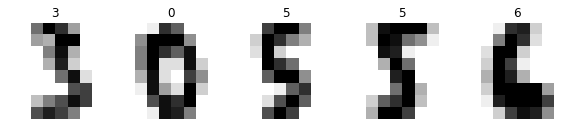

In [24]:
Predict_Value(svm_linear)

### 2. Polynomial Kernel SVM

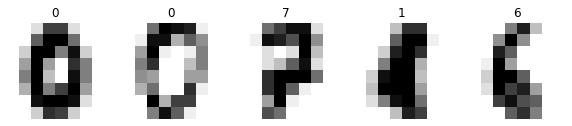

In [25]:
Predict_Value(svm_poly)

### 3. Gaussian Kernel SVM

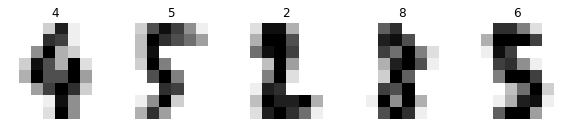

In [26]:
Predict_Value(svm_rbf)

## Result

Handwritten digit recognition using SVM model has highest accuracy with Polynomial Kernel